In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/cough_sneezing")


In [ ]:
#!python object_tracker.py

#!python sneezecolab.py




2021-01-08 09:10:26.965835: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
91
111
(1919,)
[1 1 1 ... 0 0 0]


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import requests
import json
from numpy.random import seed
import tensorflow as tf


In [ ]:
seed(50)
arr = np.arange(1919)
np.random.shuffle(arr)
arr=arr.tolist()
len(arr)

1919

In [ ]:
a=int(len(arr)*0.9)
b=1919-a
filter_indices_1 = arr[:a]
filter_indices_2 = arr[-b:]
print(len(filter_indices_1),len(filter_indices_2))

1727 192


In [ ]:
from pickle import dump,load
data_x = load(open(r'/content/gdrive/MyDrive/Colab Notebooks/cough_sneezing/data_input.pkl', 'rb'))


In [ ]:
#data_x=tf.keras.preprocessing.sequence.pad_sequences(data_x)
#test_x=tf.keras.preprocessing.sequence.pad_sequences(test_x)


In [ ]:
print(len(data_x[0]))
print(len(data_x[1]))


91
111


In [ ]:
train_x = [data_x[i] for i in filter_indices_1] 
test_x = [data_x[i] for i in filter_indices_2] 
print(len(train_x),len(test_x))


1727 192


In [ ]:
print(len(train_x[0]))
print(len(train_x[1]))


76
79


In [ ]:
import numpy as np
from pickle import dump,load
data_y = load(open(r'/content/gdrive/MyDrive/Colab Notebooks/cough_sneezing/data_output.pkl', 'rb'))


In [ ]:
train_y = [data_y[i] for i in filter_indices_1] 
test_y = [data_y[i] for i in filter_indices_2] 
print(len(train_y),len(test_y))

1727 192


In [ ]:
np.sum(train_y)/(np.sum(train_y)+np.sum(test_y))


0.89375

In [ ]:

#print(train_x[0].shape)
#print(train_x[1].shape)

#train_x=tf.keras.preprocessing.sequence.pad_sequences(train_x)
#test_x=tf.keras.preprocessing.sequence.pad_sequences(test_x)

#print(train_x[0].shape)
#print(train_x[1].shape)


In [ ]:
train_x=np.array(train_x)
print(train_x.shape)
train_x = tf.ragged.constant(train_x)
print(train_x.shape)

test_x=np.array(test_x)
test_x = tf.ragged.constant(test_x)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(1727,)
(1727, None, None)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
train_y = tf.ragged.constant(train_y)
test_y = tf.ragged.constant(test_y)



In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(1727, None, None)
(192, None, None)
(1727,)
(192,)


In [ ]:
print(np.sum(train_y))
print(np.sum(test_y))


429
51


In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout,BatchNormalization
from keras.layers import Input
from keras.layers import Conv1D
from keras.optimizers  import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2


In [ ]:
# Initialising the RNN
seed(500)
model = Sequential()



In [ ]:
# Adding the first LSTM layer and some Dropout regularisation

model.add(Input(shape=[None,128], ragged=True))

#model.add(Conv1D(32, 5, activation='tanh'))

model.add(LSTM(units = 100, activation='tanh',recurrent_regularizer=l2(0.1)))
#model.add(BatchNormalization())
#model.add(Dropout(0.95))

#model.add(Dense(256,activation='tanh'))
#model.add(BatchNormalization())
#model.add(Dropout(0.8))

# Adding a third LSTM layer and some Dropout regularisation
#model.add(LSTM(units = 100, return_sequences = True))
#model.add(Dropout(0.8))

# Adding a fourth LSTM layer and some Dropout regularisation
#model.add(LSTM(units = 100))
#model.add(Dropout(0.8 ))

# Adding the output layer
model.add(Dense(units = 1,activation = "sigmoid"))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               91600     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 91,701
Trainable params: 91,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Start Training Our Classifier 
batch_size = 128
epochs = 100
class_weight = {0: 0.5,
                1: 6}
INIT_LR = 0.001
                
opt = Adam(lr=INIT_LR, decay=INIT_LR / epochs)
model.compile(optimizer= opt,loss = "binary_crossentropy",metrics = ["accuracy"])
history = model.fit(train_x,
                    train_y,
                    batch_size = batch_size,
                    epochs = epochs,
                     class_weight=class_weight,
                    validation_data = (test_x, test_y),
                    verbose = 1)

#model.load_weights("/content/gdrive/MyDrive/Colab Notebooks/cough_sneezing/model2.h5")
#score = model.evaluate(testing_set_2, Y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/100
14/14 [==============================] - 6s 335ms/step - loss: 0.0162 - accuracy: 0.9976 - val_loss: 0.2173 - val_accuracy: 0.9531
Epoch 2/100
14/14 [==============================] - 4s 319ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.2529 - val_accuracy: 0.9479
Epoch 3/100
14/14 [==============================] - 4s 319ms/step - loss: 0.0203 - accuracy: 0.9974 - val_loss: 0.2434 - val_accuracy: 0.9427
Epoch 4/100
14/14 [==============================] - 4s 304ms/step - loss: 0.0175 - accuracy: 0.9975 - val_loss: 0.2362 - val_accuracy: 0.9427
Epoch 5/100
14/14 [==============================] - 4s 309ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.2529 - val_accuracy: 0.9531
Epoch 6/100
14/14 [==============================] - 5s 323ms/step - loss: 0.0352 - accuracy: 0.9917 - val_loss: 0.2725 - val_accuracy: 0.9479
Epoch 7/100
14/14 [==============================] - 4s 298ms/step - loss: 0.0265 - accuracy: 0.9970 - val_loss: 0.2722 - val_accuracy: 0.9375

In [ ]:
#model.save_weights("/content/gdrive/MyDrive/Colab Notebooks/cough_sneezing/model.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = model.predict(train_x)
predictions = (predictions > 0.5)

print(confusion_matrix(train_y, predictions))
print(classification_report(train_y, predictions))

[[1296    2]
 [   0  429]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00       429

    accuracy                           1.00      1727
   macro avg       1.00      1.00      1.00      1727
weighted avg       1.00      1.00      1.00      1727



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = model.predict(test_x)
predictions = (predictions > 0.50)

print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

[[138   3]
 [  6  45]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       141
           1       0.94      0.88      0.91        51

    accuracy                           0.95       192
   macro avg       0.95      0.93      0.94       192
weighted avg       0.95      0.95      0.95       192



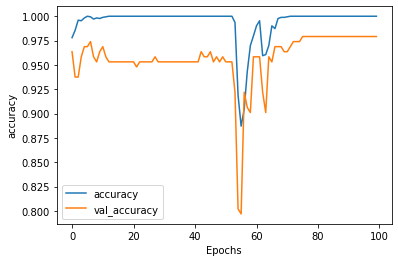

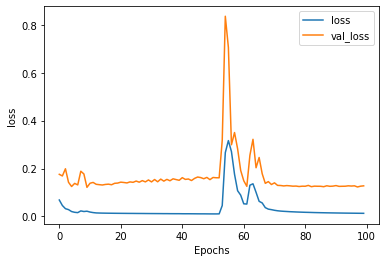

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# serialize model to JSON
#model_json = model.to_json()
#with open("model2.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model2.h5")
#print("Saved model to disk")
 
# later...

Saved model to disk


In [ ]:
from keras.models import model_from_json
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model2.h5")


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = loaded_model.predict(train_x)
predictions = (predictions > 0.5)

print(confusion_matrix(train_y, predictions))
print(classification_report(train_y, predictions))

[[1298    0]
 [   0  429]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00       429

    accuracy                           1.00      1727
   macro avg       1.00      1.00      1.00      1727
weighted avg       1.00      1.00      1.00      1727



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = loaded_model.predict(test_x)
predictions = (predictions > 0.50)

print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

[[136   5]
 [  4  47]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       141
           1       0.90      0.92      0.91        51

    accuracy                           0.95       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.95      0.95      0.95       192

